In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql

%matplotlib inline

In [104]:
df = pd.read_csv("computations_12032015.csv") 

In [105]:
df.head(5)

,id,totalcost,totalduration,airport,flightid,flightcost,parkingcost,drivingcost,timeleavehome,flightdeparture,flightduration,atairporttime,drivingduration
0,1,180.81,552,BWI,2ciqOzND4aTUuEtKvqnX82002,143.1,35.6,2.11,2016-01-25T04:15,2016-01-25T07:40-05:00,360,120,72
1,2,189.31,698,BWI,2ciqOzND4aTUuEtKvqnX82007,151.6,35.6,2.11,2016-01-25T10:00,2016-01-25T13:20-05:00,511,120,67
2,3,194.31,795,BWI,2ciqOzND4aTUuEtKvqnX8200E,156.6,35.6,2.11,2016-01-25T14:00,2016-01-25T17:15-05:00,607,120,68
3,4,194.31,775,BWI,2ciqOzND4aTUuEtKvqnX8200D,156.6,35.6,2.11,2016-01-25T14:00,2016-01-25T17:15-05:00,587,120,68
4,5,217.31,683,BWI,2ciqOzND4aTUuEtKvqnX8200U,179.6,35.6,2.11,2016-01-25T05:00,2016-01-25T08:12-05:00,491,120,72


In [106]:
list(df.columns.values)

['id',
 'totalcost',
 'totalduration',
 'airport',
 'flightid',
 'flightcost',
 'parkingcost',
 'drivingcost',
 'timeleavehome',
 'flightdeparture',
 'flightduration',
 'atairporttime',
 'drivingduration']

In [107]:
FEATURES  = [
    "flightcost",
    "parkingcost",
    "drivingcost",
    "flightduration",
    "atairporttime",
    "drivingduration"
]

LABEL_MAP = {
    1: "IAD",
    2: "DCA",
    3: "BWI",
}

In [108]:
for k,v in LABEL_MAP.items():
    computationsData.ix[computationsData.airport == k, 'airport'] = v

# Describe the dataset
print df.describe()

                id    totalcost  totalduration   flightcost  parkingcost  \
count  1316.000000  1316.000000    1316.000000  1316.000000  1316.000000   
mean    658.500000   406.321345     880.164894   355.275479    49.581763   
std     380.040787   132.397859     120.487133   133.837318    14.521403   
min       1.000000   165.810000     470.000000   128.100000    35.600000   
25%     329.750000   324.060000     809.000000   276.850000    40.000000   
50%     658.500000   389.010000     884.000000   327.600000    40.000000   
75%     987.250000   461.310000     956.000000   408.852500    68.000000   
max    1316.000000  1624.310000    1289.000000  1586.600000    68.000000   

       drivingcost  flightduration  atairporttime  drivingduration  
count  1316.000000     1316.000000    1316.000000      1316.000000  
mean      1.464103      731.861702     102.902736        45.400456  
std       0.825445      111.163350      21.850017        19.918770  
min       0.410000      350.000000     

In [109]:
# Determine the shape of the data
print "{} instances with {} features\n".format(*df.shape)

# Determine the frequency of each class
print df.groupby('airport')['airport'].count()

1316 instances with 13 features

airport
BWI    316
DCA    500
IAD    500
Name: airport, dtype: int64


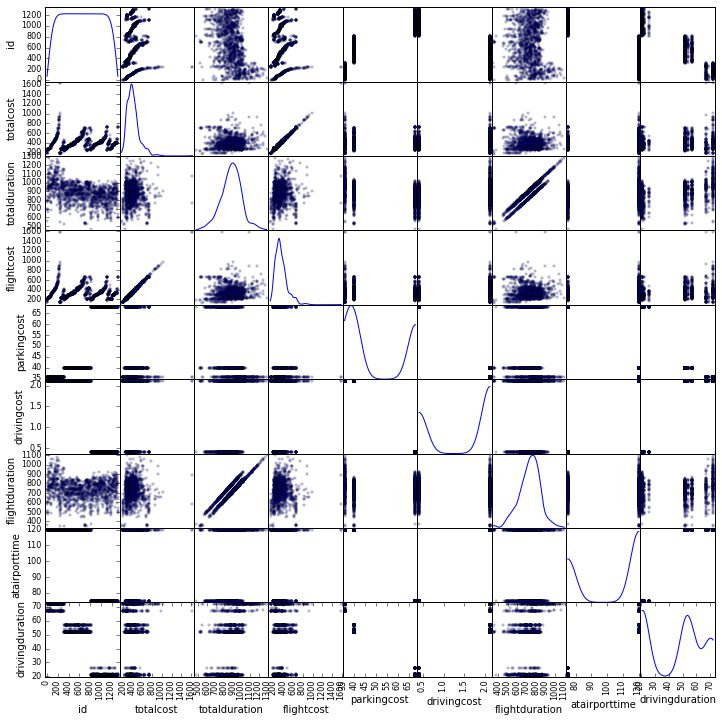

In [110]:
# Create a scatter matrix of the dataframe features
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

In [111]:
df = df.drop(['flightid'], axis=1)
df = df.drop(['timeleavehome'], axis=1)
df = df.drop(['flightdeparture'], axis=1)

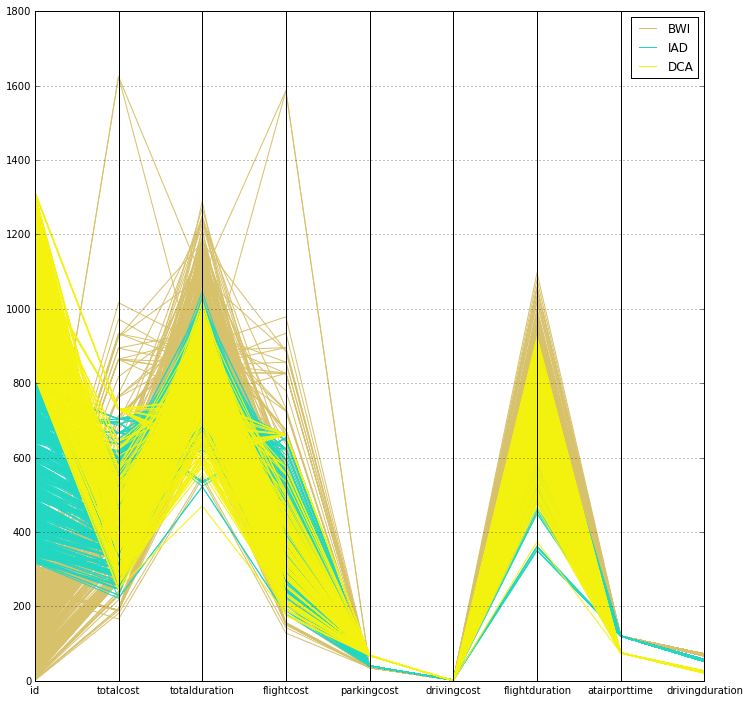

In [112]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'airport')
plt.show()

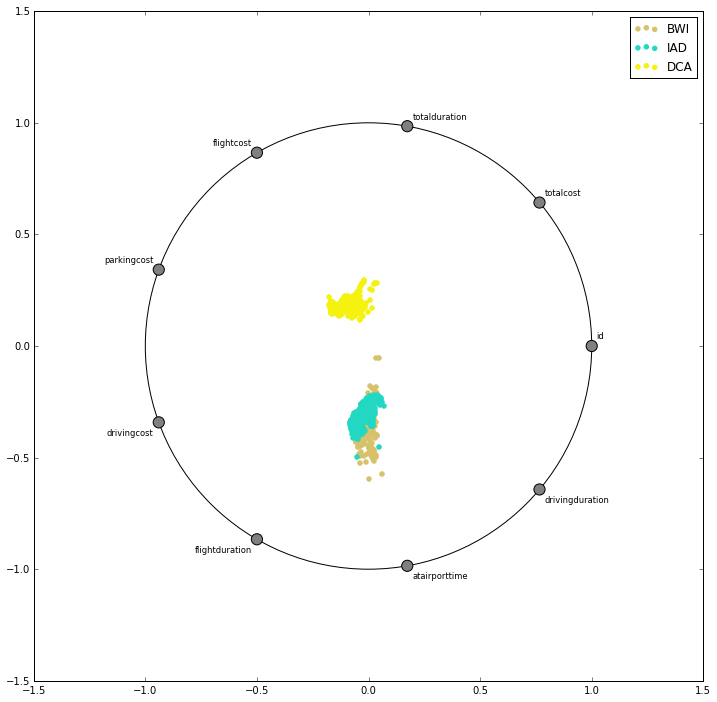

In [113]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'airport')
plt.show()

In [133]:
train = pd.read_csv("trainingData.csv") 

In [134]:
train.head(5)

,flightnumber,flightdeparturetime,airport,flightcost
0,Alaska 5,9:15:00 AM,DCA,169.00
1,Alaska 5,9:15:00 AM,DCA,169.00
2,Spirit Airlines 141,8:20:00 AM,BWI,118.13
3,American Airlines 245,5:15:00 PM,DCA,181.00
4,Spirit Airlines 141,8:20:00 AM,BWI,118.13


In [135]:
# Set some variables
numberOfSelectedFlights = train.shape[0] 
selectedFlightForIAD = len(train[train.airport == 'IAD'])
selectedFlightForDCA = len(train[train.airport == 'DCA'])
selectedFlightForBWI = len(train[train.airport == 'BWI'])

print 'the number of selectedflights is %d.' % numberOfSelectedFlights
print 'selectedFlightForIAD is %d.' % selectedFlightForIAD
print 'selectedFlightForDCA is %d.' % selectedFlightForDCA
print 'selectedFlightForBWI is %d.' % selectedFlightForBWI

the number of selectedflights is 33.
selectedFlightForIAD is 5.
selectedFlightForDCA is 17.
selectedFlightForBWI is 11.


In [163]:
AlaskaCount=0
SpiritCount=0
AACount=0
VirginCount=0
UnitedCount=0
FrontierCount=0

In [164]:
for index, row in train.iterrows():
    if row['flightnumber'].find('Alaska') != -1:
        AlaskaCount+=1
    elif 'Spirit'in row['flightnumber']:
        SpiritCount+=1
    elif 'American Airlines'in row['flightnumber']:
        AACount+=1
    elif 'Virgin'in row['flightnumber']:
        VirginCount+=1
    elif 'United'in row['flightnumber']:
        UnitedCount+=1
    elif 'Frontier'in row['flightnumber']:
        FrontierCount+=1

print "%d selected airlines is Spirit" % SpiritCount
print "%d selected airlines is Alaska" % AlaskaCount
print "%d selected airlines is AA" % AACount
print "%d selected airlines is Virgin America" % VirginCount
print "%d selected airlines is United" % UnitedCount
print "%d selected airlines is Frontier" % FrontierCount
AlaskaCount=0
SpiritCount=0
AACount=0
VirginCount=0
UnitedCount=0
FrontierCount=0

11 selected airlines is Spirit
9 selected airlines is Alaska
7 selected airlines is AA
4 selected airlines is Virgin America
1 selected airlines is United
1 selected airlines is Frontier


In [114]:
#Some current studies show the following 3 major factors in purchasing flight:
#Price (43%)
#Schedule and convenient flight time (21%)
#Frequent Flyer Program (13%)
selectedOne=df['totalcost'][0]*0.7+df['totalduration'][0]*0.3
for index, row in df.iterrows():
    costFunction=row['totalcost']*0.7+row['totalduration']*0.3
    if costFunction < selectedOne:
        selectedOne=costFunction
        selectedIndex=index

In [117]:
df = pd.read_csv("computations_12032015.csv") 

In [118]:
print "This is the recommended flight:"
print "airport,      flightid,   flightcost, flightduration"
df['airport'][selectedIndex],df['flightid'][selectedIndex],float(df['flightcost'][selectedIndex]),df['flightduration'][selectedIndex]

This is the recommended flight:
airport,      flightid,   flightcost, flightduration


('BWI', '2ciqOzND4aTUuEtKvqnX82001', 128.1, 352)